# <center><font color='#000000'>Exploring Temperature Patterns and Clustering Analysis<font><a class='anchor' id='top'></a></center>

### <center>--Kirthi Chandra--, --Rumi Tabassum--<center>

### Table of Contents
    
* [1. Introduction](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)
	
* [3. KMeans Clustering algorithm](#chapter3)

* [4. Evaluating Clustering Performance Using Metrics](#chapter4)

* [5. Conclusion](#chapter5)

## 1  Introduction  <a class="anchor" id="chapter1"></a>

Temperature variations have a significant impact on our daily lives, both indoors and outdoors. Understanding the factors influencing temperature fluctuations is essential for creating comfortable living environments. In this study, we explore temperature patterns using real-world data and apply K-means clustering analysis to identify distinct temperature clusters. Our aim is to gain insights into the relationship between indoor and outdoor temperatures and uncover valuable information regarding temperature dynamics.

**Data Preprocessing:**

To begin, we import the necessary libraries and load the dataset. The data is then cleaned and preprocessed for further analysis. Columns are appropriately renamed, and a new column is added to represent the month name. Numerical columns are converted to the desired data type, ensuring accurate calculations and analysis.

Exploring Relevance of the Day of the Week:
Next, we focus on the relevance of the day of the week in relation to mean outside and inside temperatures. By analyzing this relationship, we gain insights into how temperature patterns vary across different days of the week. This analysis helps us understand the influence of factors such as weekdays, weekends, and seasonal variations on temperature fluctuations.

Filtering and Focusing on a Specific Location:
To streamline our analysis, we narrow down our dataset to a specific location. In this case, we focus on the Madhapur area. By isolating the data for this location, we remove redundancy and ensure that our analysis is specific to the given area of interest.

**K-means Clustering:**

To identify meaningful temperature clusters, we apply K-means clustering analysis to the dataset. Specifically, we focus on two numerical fields: outside temperature and inside temperature. Before clustering, we scale the data using the standard scaler to ensure fair and accurate comparison.

Determining Optimal Number of Clusters:
Using the elbow diagram, we visualize the within-cluster sum of squares (WCSS) for different numbers of clusters. The elbow diagram helps us identify the optimal number of clusters that strikes a balance between capturing meaningful structure and avoiding excessive complexity. We select the number of clusters based on the point on the elbow plot where the improvement in WCSS becomes marginal.

Cluster Analysis and Centroid Visualization:
After determining the optimal number of clusters, we apply K-means clustering to classify the centroids. We assess the scores and metrics to evaluate the quality of the clustering. In this analysis, we find that cluster 2 exhibits the best-suited score.

**Interpreting Cluster Results:**

Analyzing the findings, we observe that the most frequently observed outdoor temperature cluster has an average ranging from 29.45°C to 32.58°C. In comparison, the indoor temperature cluster averages between 29.09°C and 32.51°C. These insights provide valuable information regarding temperature ranges in Madhapur, highlighting the differences between indoor and outdoor environments.

**Conclusion:**

This study highlights the relevance of temperature patterns and the impact of factors such as location, day of the week, and seasonal variations. By applying K-means clustering analysis, we gain insights into distinct temperature clusters and uncover valuable information regarding temperature dynamics. The findings contribute to our understanding of temperature fluctuations and provide useful knowledge for creating comfortable living and working environments.

## 2. Data Health Review <a class = "anchor" id = "chapter2"> </a>

### 2.1 Importing Libraries <a class = "anchor" id = "chapter2.1"> </a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Importing the Data <a class = "anchor" id = "chapter2.2"></a>

In [2]:
df = pd.read_excel('Difference_In_Air_Temperature.xlsx')
df.head(3)

,DATE,INSIDE TEMPERATURE,OUTSIDE TEMPERATURE,NIGHT TEMPERATURE,Unnamed: 4,LOCATION
0,2023-03-13,31.6˚C,35.0˚C,NaN,NaN,MADHAPUR
1,2023-03-14,30.3˚C,30.2˚C,NaN,NaN,MADHAPUR
2,2023-03-15,31.1˚C,30.3˚C,NaN,NaN,MADHAPUR


## 2.3 Data Cleaning and Preprocessing <a class= "anchor" id = "chapter2.3"></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0        DATE            53 non-null     datetime64[ns]
 1   INSIDE TEMPERATURE   53 non-null     object        
 2   OUTSIDE TEMPERATURE  53 non-null     object        
 3   NIGHT TEMPERATURE    12 non-null     object        
 4   Unnamed: 4           12 non-null     object        
 5      LOCATION          53 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.6+ KB


In [4]:
df.columns

Index(['     DATE', 'INSIDE TEMPERATURE', 'OUTSIDE TEMPERATURE',
       'NIGHT TEMPERATURE', 'Unnamed: 4', '   LOCATION'],
      dtype='object')

#### Renaming the Columns

In [5]:
df.rename(columns = {'     DATE':'Date','INSIDE TEMPERATURE':'InsideAirTemp','OUTSIDE TEMPERATURE':'OutsideAirTemp', '   LOCATION':'Location'}, inplace = True)
df.columns

Index(['Date', 'InsideAirTemp', 'OutsideAirTemp', 'NIGHT TEMPERATURE',
       'Unnamed: 4', 'Location'],
      dtype='object')

#### Adding Month Name column

In [6]:
# df['Date'] = pd.to_datetime(df['Date'])
df['Month_name'] = df['Date'].dt.strftime("%B")
df['Month_name'].head(4)

0    March
1    March
2    March
3    March
Name: Month_name, dtype: object

In [7]:
df.columns

Index(['Date', 'InsideAirTemp', 'OutsideAirTemp', 'NIGHT TEMPERATURE',
       'Unnamed: 4', 'Location', 'Month_name'],
      dtype='object')

In [8]:
df['Location'].value_counts()

MADHAPUR    41
KHAMMAM     12
Name: Location, dtype: int64

#### Changing the data type of numerical number

In [9]:
df['InsideAirTemp'] = df['InsideAirTemp'].str.replace('˚C','').astype(float)
df['OutsideAirTemp'] = df['OutsideAirTemp'].str.replace('˚C','').astype(float)

#### Taking the data of only one location feature 

In [10]:
df_Madhapur = df[df['Location'] == 'MADHAPUR']
df_Madhapur['DayOfWeek'] = df_Madhapur['Date'].dt.day_name()

C:\Users\kirthi chandra\AppData\Local\Temp\ipykernel_776\3857991625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Madhapur['DayOfWeek'] = df_Madhapur['Date'].dt.day_name()


#### Find out the relevance of the day of the week in mean outside and inside temperature

In [11]:
df_Madhapur.groupby('DayOfWeek').mean()

,InsideAirTemp,OutsideAirTemp
DayOfWeek,,
Friday,31.250000,31.416667
Monday,31.757143,32.328571
Saturday,30.720000,30.760000
Sunday,30.720000,31.040000
Thursday,30.916667,31.516667
Tuesday,31.400000,31.416667
Wednesday,32.400000,31.800000


In [12]:
df_Madhapur.head(5)

,Date,InsideAirTemp,OutsideAirTemp,NIGHT TEMPERATURE,Unnamed: 4,Location,Month_name,DayOfWeek
0,2023-03-13,31.6,35.0,NaN,NaN,MADHAPUR,March,Monday
1,2023-03-14,30.3,30.2,NaN,NaN,MADHAPUR,March,Tuesday
2,2023-03-15,31.1,30.3,NaN,NaN,MADHAPUR,March,Wednesday
3,2023-03-16,26.1,28.8,NaN,NaN,MADHAPUR,March,Thursday
4,2023-03-17,28.0,28.2,NaN,NaN,MADHAPUR,March,Friday


#### taking the data of only madhapur and removing redundent data

In [13]:
df_Madhapur = df_Madhapur.iloc[:, [0,1,2,5,6,7]]
df_Madhapur.head(4)

,Date,InsideAirTemp,OutsideAirTemp,Location,Month_name,DayOfWeek
0,2023-03-13,31.6,35.0,MADHAPUR,March,Monday
1,2023-03-14,30.3,30.2,MADHAPUR,March,Tuesday
2,2023-03-15,31.1,30.3,MADHAPUR,March,Wednesday
3,2023-03-16,26.1,28.8,MADHAPUR,March,Thursday


In [14]:
df_Madhapur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            41 non-null     datetime64[ns]
 1   InsideAirTemp   41 non-null     float64       
 2   OutsideAirTemp  41 non-null     float64       
 3   Location        41 non-null     object        
 4   Month_name      41 non-null     object        
 5   DayOfWeek       41 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 2.2+ KB


In [15]:
df_Madhapur.shape

(41, 6)

## 3. KMeans Clustering algorithm <a class = "anchor" id = "chapter3"> </a>

#### Applying KMeans for only two numerical fields which is outside temperature and Inside temperature

In [16]:
df_Madhapur_Cont = df_Madhapur[['InsideAirTemp', 'OutsideAirTemp']]
df_Madhapur_Cont.head(3)

,InsideAirTemp,OutsideAirTemp
0,31.6,35.0
1,30.3,30.2
2,31.1,30.3


#### Scaling the data through standard scaler 

In [17]:
# Scaling the Data Frame

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit_transform(df_Madhapur_Cont)


#### Applying KMeans Clustering to find the best suited classification of centroids

In [18]:
# using Clustering

from sklearn.cluster import KMeans

WSS = [] # inter cluster distance

for i in range(1,15):
    m = KMeans(n_clusters = i)
    m = m.fit(ss)
    WSS.append(m.inertia_)
    
WSS

C:\Users\kirthi_chandra_anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[82.00000000000003,
 29.514163428865416,
 13.818237484692261,
 9.601681872948479,
 7.646615197103176,
 5.612812043691299,
 4.605181047023748,
 3.4171926597955693,
 2.8352967511288822,
 2.028539819243065,
 1.5929155237918993,
 1.3124919116160507,
 1.1433635576768442,
 0.9709591556712674]

#### Using Elbow Diagram to visualise the Within Sum of Squares

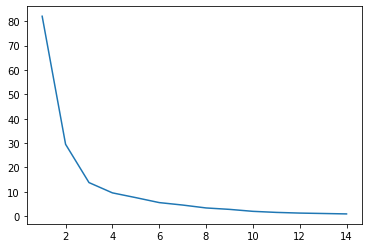

In [19]:
plt.plot(range(1,15),WSS)

#### Finding the least suitable number of centroids

In [20]:
diff_WSS = []

for i in range(0,10):
    diff_WSS.append(WSS[i]-WSS[i+1])
    
diff_WSS

[52.48583657113461,
 15.695925944173155,
 4.216555611743782,
 1.9550666758453028,
 2.033803153411877,
 1.007630996667551,
 1.1879883872281791,
 0.5818959086666871,
 0.8067569318858174,
 0.43562429545116554]

## 4. Evaluating Clustering Performance Using Metrics <a class = "anchor" id = "chapter4"></a>

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,9):
    KM = KMeans(n_clusters = i,random_state = 1)
    KM.fit(ss)
    labels = KM.labels_
    print(silhouette_score(ss,labels, random_state = 1))

0.5373798887841813
0.5232671055784321
0.4907736853575555
0.48786073721789336
0.4956853109083093
0.5035410831331091
0.48534067912802553


#### Best suited score is cluster 2

In [22]:
mod2 = KMeans(n_clusters = 2)
mod2 = mod2.fit(ss)

df_Madhapur['Clusters'] = mod2.labels_

df_Madhapur.head()

,Date,InsideAirTemp,OutsideAirTemp,Location,Month_name,DayOfWeek,Clusters
0,2023-03-13,31.6,35.0,MADHAPUR,March,Monday,1
1,2023-03-14,30.3,30.2,MADHAPUR,March,Tuesday,0
2,2023-03-15,31.1,30.3,MADHAPUR,March,Wednesday,0
3,2023-03-16,26.1,28.8,MADHAPUR,March,Thursday,0
4,2023-03-17,28.0,28.2,MADHAPUR,March,Friday,0


#### Finding the location of Centroids and visualising it

In [23]:
# Coordinates of Centroids

centroids = mod2.cluster_centers_
centroids

array([[-1.10153796, -1.12047315],
       [ 0.57116783,  0.58098608]])

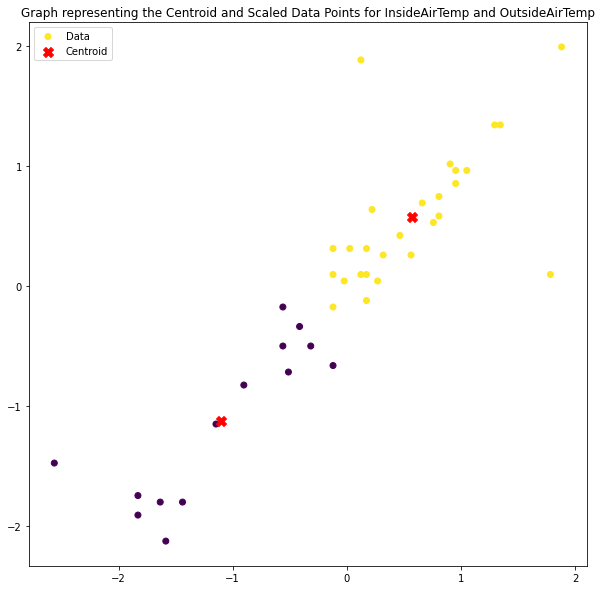

In [24]:
plt.figure(figsize = (10,10))

plt.scatter (ss[:, 0], ss[:, 1], c =  df_Madhapur['Clusters'], cmap = 'viridis')

plt.scatter(centroids[:,0], centroids [:,1], marker = 'X', s = 100, c = 'red', label = 'Centroids')

plt.legend(['Data', 'Centroid'])
plt.title('Graph representing the Centroid and Scaled Data Points for InsideAirTemp and OutsideAirTemp')
plt.show()

#### Finding the values of Centroids of clusters in real Data

In [25]:
mod2 = KMeans(n_clusters = 2)
mod2 = mod2.fit(df_Madhapur_Cont)
mod2

KMeans(n_clusters=2)

In [26]:
mod2.cluster_centers_

array([[29.09285714, 29.45      ],
       [32.51851852, 32.58888889]])

## 5. Conclusion <a class = "anchor" id = "chapter5"></a>

#### The findings revealed that the most frequently observed outdoor temperature cluster exhibited an average of 32.58°C on the higher end and 29.45°C on the lower end. In comparison, the indoor temperature cluster had an average of 32.51°C on the higher end and 29.09°C on the lower end.

## <center>Thank YOu<center>